In [ ]:
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

data_set='/work/creditcard.csv'

In [ ]:
def dataset_summary(train_X, test_X, train_y, test_y):
    
    print()
    print("---------Dataset Summary----------")
    print("Total training samples:", len(train_X))
    print("Total training samples corresponding to class 0:", len(train_y[train_y[:]==0]))
    print("Total training samples corresponding to class 1:", len(train_y[train_y[:]==1]))
    print()
    print("Total testing samples:", len(test_X))
    print("Total testing samples corresponding to class 0:", len(test_y[test_y[:]==0]))
    print("Total testing samples corresponding to class 1:", len(test_y[test_y[:]==1]))
    print("----------------------------------")
    print()

In [ ]:
def oversampling(X, y):
    print("doing over sampling....")
    oversample = RandomOverSampler(sampling_strategy='minority')
    X_over, y_over = oversample.fit_resample(X, y)
    return X_over, y_over

In [ ]:
def undersampling(X, y):
    print("doing under sampling....")
    undersample = RandomUnderSampler(sampling_strategy='majority')
    X_under, y_under = undersample.fit_resample(X, y)
    return X_under, y_under

In [ ]:
def Sampling(X,y,strategy="over"):
    if(strategy == "over"):
        return oversampling(X,y)
    elif(strategy == "under"):
         return undersampling(X,y)
    else:
         return X,y

In [ ]:
#importing the data

def read_dataset(csv_file_path,isSampling="false",isScaling=False ,test_size=0.2, random_state=100):
    df = pd.read_csv(csv_file_path)
    df = df.drop(['Amount','Time'], axis=1)
    
    y = df['Class']
    X = df.drop(['Class'], axis=1)
    
    if isSampling != "false":
        print("With Sampling")
        X,y=Sampling(X,y,isSampling)
    else:
        print("Without Sampling")
    
    #random state is for reproducing the same training and testing set,if we do not use this then
    #every time it will give different sets

    #spliting the data set into training and testing set
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = test_size, random_state=random_state)
    
    if isScaling:
        print("MinMax Scalling is done")
        #MinMax scaling
        scaler = MinMaxScaler()
        train_X = scaler.fit_transform(train_X)
        test_X = scaler.transform(test_X)
    
    return train_X, test_X, train_y, test_y

In [ ]:
def classifier(X_train,Y_train,X_test,cat="entropy"):

    #training using criteria
    clf = RandomForestClassifier(n_estimators = 100,criterion=cat,min_samples_leaf=5)
    clf.fit(X_train,Y_train)
    y_pred=clf.predict(X_test)
    

    return y_pred

In [ ]:
def evaluate(test_y,y_pred):
    #doubt 
    #y_pred = y_pred >= 0.5
        
    print()
    print("Classification Report:")
    print(classification_report(test_y, y_pred))
        
    cf_matrix = confusion_matrix(test_y, y_pred)
        
    print()
    print("Confusion Matrix:")
    print(cf_matrix)
    print ("Accuracy : ",accuracy_score(test_y,y_pred)*100)
    sns.heatmap(cf_matrix, annot=True, fmt='g')
        
    plt.show()

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

With Sampling
doing under sampling....

---------Dataset Summary----------
Total training samples: 787
Total training samples corresponding to class 0: 386
Total training samples corresponding to class 1: 401

Total testing samples: 197
Total testing samples corresponding to class 0: 106
Total testing samples corresponding to class 1: 91
----------------------------------


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       106
           1       0.98      0.89      0.93        91

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197


Confusion Matrix:
[[104   2]
 [ 10  81]]
Accuracy :  93.90862944162437


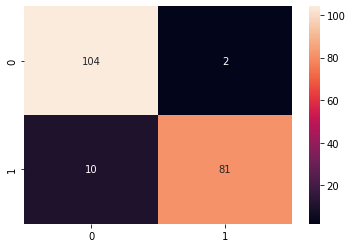

In [ ]:
if __name__ == '__main__':
    
    # X,y = read_dataset('../creditcard.csv')

    # for sampling of data pass True after csv file, by default it is false
    # for scalling of data pass True after sampling 
    train_X, test_X, train_y, test_y = read_dataset(data_set,"under")
    dataset_summary(train_X, test_X, train_y, test_y)

    #by default entropy based classifier 
    y_predict=classifier(train_X,train_y,test_X)

    #gini based classsifier
    # y_predict=classifier(train_X,train_y,test_X,"gini")
    evaluate(test_y,y_predict)

    
    

With Sampling
doing over sampling....

---------Dataset Summary----------
Total training samples: 454904
Total training samples corresponding to class 0: 227735
Total training samples corresponding to class 1: 227169

Total testing samples: 113726
Total testing samples corresponding to class 0: 56580
Total testing samples corresponding to class 1: 57146
----------------------------------


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56580
           1       1.00      1.00      1.00     57146

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Confusion Matrix:
[[56566    14]
 [    0 57146]]
Accuracy :  99.98768971035648


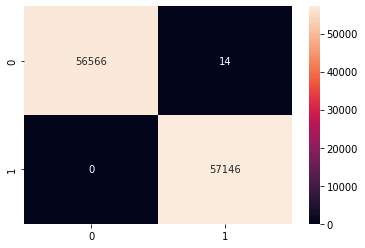

In [ ]:
if __name__ == '__main__':
    
    # X,y = read_dataset('../creditcard.csv')

    # for sampling of data pass True after csv file, by default it is false
    # for scalling of data pass True after sampling 
    train_X, test_X, train_y, test_y = read_dataset(data_set,"over")
    dataset_summary(train_X, test_X, train_y, test_y)

    #by default entropy based classifier 
    y_predict=classifier(train_X,train_y,test_X)

    #gini based classsifier
    # y_predict=classifier(train_X,train_y,test_X,"gini")
    evaluate(test_y,y_predict)

Without Sampling

---------Dataset Summary----------
Total training samples: 227845
Total training samples corresponding to class 0: 227449
Total training samples corresponding to class 1: 396

Total testing samples: 56962
Total testing samples corresponding to class 0: 56866
Total testing samples corresponding to class 1: 96
----------------------------------


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.82      0.71      0.76        96

    accuracy                           1.00     56962
   macro avg       0.91      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56851    15]
 [   28    68]]
Accuracy :  99.92451107756047


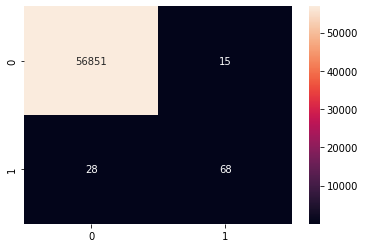

In [ ]:
if __name__ == '__main__':
    
    # X,y = read_dataset('../creditcard.csv')

    # for sampling of data pass True after csv file, by default it is false
    # for scalling of data pass True after sampling 
    train_X, test_X, train_y, test_y = read_dataset(data_set,"false")
    dataset_summary(train_X, test_X, train_y, test_y)

    #by default entropy based classifier 
    y_predict=classifier(train_X,train_y,test_X)

    #gini based classsifier
    # y_predict=classifier(train_X,train_y,test_X,"gini")
    evaluate(test_y,y_predict)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=920001f5-8a05-4b55-92fa-5a8f292e2307' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>